In [209]:
#In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classiﬁcation model that estimates an applicant’s probability of admission based the scores from those two exams.

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [211]:
df=pd.read_csv('ex2data1.txt', delimiter=',')

In [212]:
s1=np.array([df['score1']])
s2=np.array([df['score2']])
m=np.size(s1)
X=np.zeros((m,3))
X[:,0]=np.ones((m))
X[:,1]=s1
X[:,2]=s2

theta=np.zeros((3))

Y=np.array(df['Y']).reshape(m,1)
l1=np.where(Y==1)[0]
l2=np.where(Y==0)[0]




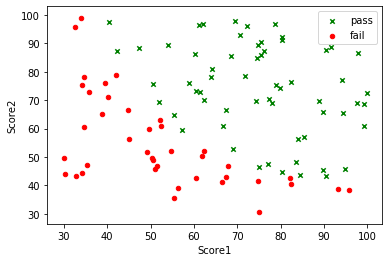

In [213]:
#visualizing the data
plt.scatter(X[l1,1],X[l1,2],marker='x',color='green', s=20, label='pass')    #scores with admission
plt.scatter(X[l2,1],X[l2,2],marker='o',color='red', s=20,label='fail')      #scores without admission
plt.xlabel('Score1')
plt.ylabel('Score2')
plt.legend(['pass','fail'])
plt.show()



In [214]:
#defining the sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

    


In [215]:
#defining the cost function
def compute_cost(theta,X,Y):
    theta=theta.reshape(3,1)
    
    z=np.dot(X,theta)
    
    H=sigmoid(z)
    
    J= (1/m)*np.sum(-Y*np.log(H)-(1-Y)*np.log(1-H))
    

    grad =(np.dot(X.T,(H-Y))/m)
    
    
    return J,grad
    
[cost,grad]=compute_cost(theta,X,Y)


In [216]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=compute_cost, x0=theta, args=(X, Y))
print('the optimized theta values are:', result[0])


the optimized theta values are: [-25.16131862   0.20623159   0.20147149]


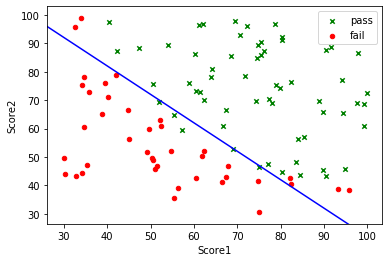

In [219]:
plt.scatter(X[l1,1],X[l1,2],marker='x',color='green', s=20, label='pass')    #scores with admission
plt.scatter(X[l2,1],X[l2,2],marker='o',color='red', s=20,label='fail')      #scores without admission
plt.xlabel('Score1')
plt.ylabel('Score2')
plt.legend(['pass','fail'])
ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = -(x_vals * result[0][1] + result[0][0])/result[0][1]
plt.plot(x_vals, y_vals, c="blue")

plt.show()